In [30]:
import tensorflow

In [31]:
import keras

In [32]:
vgg16_model = keras.applications.vgg16.VGG16()

In [33]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [34]:
type(vgg16_model)
keras.engine.training.Model

keras.engine.training.Model

In [35]:
import keras.models
import numpy as np
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Lambda, Dense, Flatten
from keras.optimizers import Adam

import os
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.preprocessing import image

In [36]:
model = Sequential()
for layer in vgg16_model.layers:
    model.add(layer)

In [37]:
for layer in model.layers:
    layer.trainable = False

In [38]:
model.add(Dense(2, activation='softmax'))

In [39]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [40]:
model.compile(optimizer=Adam(learning_rate=.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [41]:
from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import image
model.compile(optimizer=Adam(learning_rate=.0001), loss='categorical_crossentropy', metrics=['accuracy'])

LOADING FILES

In [42]:
train_datagen=ImageDataGenerator(preprocessing_function=preprocess_input) 

train_generator=train_datagen.flow_from_directory('C:\\Users\\Nick\\Trans9', 
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 batch_size=1,
                                                 class_mode='categorical',
                                                 shuffle=True)

Found 72 images belonging to 2 classes.


In [43]:
import h5py
checkpoint_path = "C:\\Users\\Nick\\anaconda3\\envs\\tenf\\training4\\cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
cp_callback = tensorflow.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)


TRAIN

In [44]:
step_size_train=train_generator.n//train_generator.batch_size
model.fit_generator(generator=train_generator,
                   steps_per_epoch=step_size_train,
                   epochs=30,
                   callbacks=[cp_callback])

Epoch 1/30
72/72 [==============================] - 59s 817ms/step - loss: 0.6926 - accuracy: 0.7222

Epoch 00001: saving model to C:\Users\Nick\anaconda3\envs\tenf\training4\cp.ckpt
Epoch 2/30
72/72 [==============================] - 53s 734ms/step - loss: 0.6923 - accuracy: 0.7222

Epoch 00002: saving model to C:\Users\Nick\anaconda3\envs\tenf\training4\cp.ckpt
Epoch 3/30
72/72 [==============================] - 51s 713ms/step - loss: 0.6916 - accuracy: 0.7917

Epoch 00003: saving model to C:\Users\Nick\anaconda3\envs\tenf\training4\cp.ckpt
Epoch 4/30
72/72 [==============================] - 52s 722ms/step - loss: 0.6910 - accuracy: 0.9028

Epoch 00004: saving model to C:\Users\Nick\anaconda3\envs\tenf\training4\cp.ckpt
Epoch 5/30
72/72 [==============================] - 52s 716ms/step - loss: 0.6905 - accuracy: 0.9028

Epoch 00005: saving model to C:\Users\Nick\anaconda3\envs\tenf\training4\cp.ckpt
Epoch 6/30
72/72 [==============================] - 54s 750ms/step - loss: 0.6900 - a

In [45]:
model.load_weights(checkpoint_path)

'___________________________________________________________________________________________'

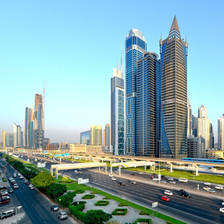

[1]


'___________________________________________________________________________________________'

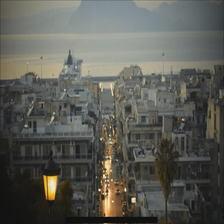

[1]


'___________________________________________________________________________________________'

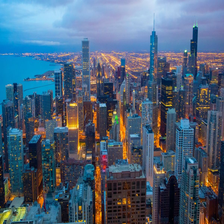

[1]


'___________________________________________________________________________________________'

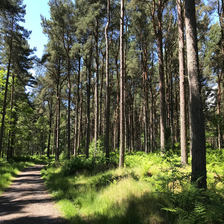

[0]


'___________________________________________________________________________________________'

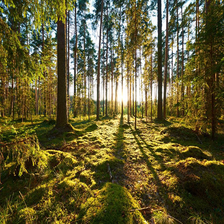

[0]


'___________________________________________________________________________________________'

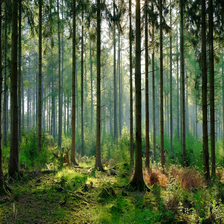

[0]


In [46]:
from PIL import Image, ImageFile
import requests
import numpy as np
from io import BytesIO
from IPython.display import display, HTML


IMAGE_WIDTH = 224
IMAGE_HEIGHT = 224
IMAGE_CHANNELS = 3

images = [
    "https://q-cf.bstatic.com/images/hotel/max1024x768/211/211654390.jpg",
    "https://sense.city/main_files/images/video_screen.jpg",
    "https://bgfons.com/uploads/city/city_texture6440.jpg",
    "https://media-cdn.tripadvisor.com/media/photo-m/1280/17/f5/2f/c3/wide-paths-throughout.jpg",
    "https://lh3.googleusercontent.com/proxy/QqmgPLPE_BbF_W8DSzOPIYHorAYhgVhDzQFZvNUygJZgvtMNd_lMELVEPydtGiSNKyKI1BpdDN8v1flnROt9N8xhElcbhT1xAOaYB-Fc4e-IT1CA4rji5DTcvRQZ6aH9pNYdvyug7iGKF32DEB84ksDRZh5sq4W4umgGGZk0ELN2OEzo_zQ",
    "https://www.carbonbrief.org/wp-content/uploads/2015/08/stock-forest-wood-england-UK-1550x804.jpg"
    
]


def make_square(img):
    cols,rows = img.size
    
    if rows>cols:
        pad = (rows-cols)/2
        img = img.crop((pad,0,cols,cols))
    else:
        pad = (cols-rows)/2
        img = img.crop((0,pad,rows,rows))
    
    return img
        
for url in images:
    x = []
    ImageFile.LOAD_TRUNCATED_IMAGES = False
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    img.load()
    img = img.resize((IMAGE_WIDTH,IMAGE_HEIGHT),Image.ANTIALIAS)
    
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    pred = model.predict(x)
    
    display("___________________________________________________________________________________________")
    display(img)
    print(np.argmax(pred,axis=1))